## Estudos PySpark

Notebook dedicado ao estudo de PySpark, com datasets públicos de dados do Prouni 2018.

Fonte : [Dataset Prouni 2018]( https://brasil.io/dataset/cursos-prouni/cursos/)

**Imports**

In [1]:
from pyspark.sql.functions import *
from pyspark.sql import SparkSession
from pyspark.sql.types import IntegerType
from pyspark.sql.window import Window

### SparkSession

Sem o SparkSession, sua aplicação spark não consegue rodar. Cria o SparkContext e SparkConfig.

**SparkContext**

* É o principal ponto de entrada na funcionalidade do Spark e, portanto, o coração de qualquer aplicativo Spark. 
* Permite que o Spark Driver acesse o cluster por meio de seu Cluster Resource Manager e pode ser usado para criar RDDs, acumuladores e variáveis de transmissão no cluster. 
* O Spark Context também rastreia os executores em tempo real, enviando mensagens regulares de pulsação.
* O Spark Context é criado pelo Spark Driver para cada aplicativo Spark quando é enviado pela primeira vez pelo usuário. Ele existe durante todo o tempo de vida do aplicativo Spark.
* Para de funcionar depois que o aplicativo Spark é concluído. 
* Para cada JVM, apenas um Spark Context pode estar ativo.

In [2]:
spark = (SparkSession.builder 
        .master("local[*]") 
        .appName("workshop_spark")
        .getOrCreate())

### Spark UI

O Apache Spark fornece um conjunto de interfaces de usuário da web (UIs) que você pode usar para monitorar o status e o consumo de recursos do cluster Spark.

In [3]:
#Verificar a UI localhost:4040
spark

In [4]:
cursos_prouni = spark.read.option("header", True).csv("../data/cursos-prouni.csv")
enderecos = spark.read.option("header", True).csv("../data/enderecos-campi.csv")

### Conhecendo os dados 

**Cursos**

In [5]:
cursos_prouni.limit(3).toPandas()

,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,uf_busca,cidade_filtro,universidade_nome,campus_nome,campus_id,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Bacharelado,Integral,9999.99,15,14,None,None,706710394154,Medicina,Campo Grande,MS,NTAwMjAwNDAyNzA0,Universidade Anhanguera - UNIDERP,CAMPO GRANDE - SEDE - Miguel Couto,706710,Medicina,740.22,726.46,None,None
1,Bacharelado,Noturno,9836.4,1,None,None,None,104191210567043,Enfermagem,Crateus,CE,MjMwNDAxODA0MTAz,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Enfermagem,663.36,None,None,None
2,Bacharelado,Integral,9715.61,2,5,6,10,1002328574024,Medicina,Sao Paulo,SP,MzUxNTA2MTUwMzA4,Universidade Cidade de São Paulo - UNICID,UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SE...,1002328,Medicina,739.62,738.08,738.96,718.64


In [6]:
print(cursos_prouni.dtypes)

[('grau', 'string'), ('turno', 'string'), ('mensalidade', 'string'), ('bolsa_integral_cotas', 'string'), ('bolsa_integral_ampla', 'string'), ('bolsa_parcial_cotas', 'string'), ('bolsa_parcial_ampla', 'string'), ('curso_id', 'string'), ('curso_busca', 'string'), ('cidade_busca', 'string'), ('uf_busca', 'string'), ('cidade_filtro', 'string'), ('universidade_nome', 'string'), ('campus_nome', 'string'), ('campus_id', 'string'), ('nome', 'string'), ('nota_integral_ampla', 'string'), ('nota_integral_cotas', 'string'), ('nota_parcial_ampla', 'string'), ('nota_parcial_cotas', 'string')]


In [7]:
print(cursos_prouni.count())

41447


In [8]:
cursos_prouni.columns

['grau',
 'turno',
 'mensalidade',
 'bolsa_integral_cotas',
 'bolsa_integral_ampla',
 'bolsa_parcial_cotas',
 'bolsa_parcial_ampla',
 'curso_id',
 'curso_busca',
 'cidade_busca',
 'uf_busca',
 'cidade_filtro',
 'universidade_nome',
 'campus_nome',
 'campus_id',
 'nome',
 'nota_integral_ampla',
 'nota_integral_cotas',
 'nota_parcial_ampla',
 'nota_parcial_cotas']

**Endereços**

In [9]:
enderecos.limit(3).toPandas()

,uf,municipio,logradouro,complemento,bairro,telefone,external_id
0,SP,Presidente Prudente,Rodovia Raposo Tavares Km 572,Km 572 -,Limoeiro,18 3229 2000,2522
1,SP,Sao Paulo,Avenida Interlagos,1329 - Universidade Ibirapuera,Jardim Umuarama,1150911193,1072704
2,SC,Balneario Camboriu,Avenida do Estado,3847 -,Centro,(47)3264-6813,8327


In [10]:
print(enderecos.dtypes)

[('uf', 'string'), ('municipio', 'string'), ('logradouro', 'string'), ('complemento', 'string'), ('bairro', 'string'), ('telefone', 'string'), ('external_id', 'string')]


In [11]:
print(enderecos.count())

5062


In [12]:
enderecos.columns

['uf',
 'municipio',
 'logradouro',
 'complemento',
 'bairro',
 'telefone',
 'external_id']

### Filtrando os dados

In [13]:
cursos_prouni.columns

['grau',
 'turno',
 'mensalidade',
 'bolsa_integral_cotas',
 'bolsa_integral_ampla',
 'bolsa_parcial_cotas',
 'bolsa_parcial_ampla',
 'curso_id',
 'curso_busca',
 'cidade_busca',
 'uf_busca',
 'cidade_filtro',
 'universidade_nome',
 'campus_nome',
 'campus_id',
 'nome',
 'nota_integral_ampla',
 'nota_integral_cotas',
 'nota_parcial_ampla',
 'nota_parcial_cotas']

In [14]:
cursos_prouni_filter = (cursos_prouni
                       .select("uf_busca","grau","turno","mensalidade","curso_id","nome", "universidade_nome"))

In [15]:
cursos_prouni_filter.show()

+--------+------------+--------+-----------+---------------+--------------------+--------------------+
|uf_busca|        grau|   turno|mensalidade|       curso_id|                nome|   universidade_nome|
+--------+------------+--------+-----------+---------------+--------------------+--------------------+
|      MS| Bacharelado|Integral|    9999.99|   706710394154|            Medicina|Universidade Anha...|
|      CE| Bacharelado| Noturno|     9836.4|104191210567043|          Enfermagem|Faculdade Princes...|
|      SP| Bacharelado|Integral|    9715.61|  1002328574024|            Medicina|Universidade Cida...|
|      CE| Bacharelado| Noturno|    9689.34|104191212798093|          Psicologia|Faculdade Princes...|
|      AC| Bacharelado|Integral|    9674.34| 65899611932754|            Medicina|Faculdade Barão d...|
|      SP| Bacharelado|Integral|     9650.0|    65781564964|            Medicina|Universidade do O...|
|      SP| Bacharelado|Integral|     9564.0|    65788486984|            M

In [16]:
prouni_notas = (cursos_prouni
               .select("curso_id","nota_integral_ampla","nota_integral_cotas", "nota_parcial_ampla", "nota_parcial_cotas"))

In [17]:
prouni_notas.show()

+---------------+-------------------+-------------------+------------------+------------------+
|       curso_id|nota_integral_ampla|nota_integral_cotas|nota_parcial_ampla|nota_parcial_cotas|
+---------------+-------------------+-------------------+------------------+------------------+
|   706710394154|             740.22|             726.46|              null|              null|
|104191210567043|             663.36|               null|              null|              null|
|  1002328574024|             739.62|             738.08|            738.96|            718.64|
|104191212798093|              651.0|             652.22|              null|              null|
| 65899611932754|             758.32|             723.94|            734.92|            711.26|
|    65781564964|             738.92|             728.86|              null|              null|
|    65788486984|             744.16|              735.0|              null|              null|
| 65861111850254|             747.84|   

In [18]:
enderecos_filter = enderecos.where(col("uf") == "SP")

In [19]:
enderecos_filter.show()

+---+-------------------+--------------------+--------------------+-----------------+--------------------+-----------+
| uf|          municipio|          logradouro|         complemento|           bairro|            telefone|external_id|
+---+-------------------+--------------------+--------------------+-----------------+--------------------+-----------+
| SP|Presidente Prudente|Rodovia Raposo Ta...|            Km 572 -|         Limoeiro|        18 3229 2000|       2522|
| SP|          Sao Paulo|  Avenida Interlagos|1329 - Universida...|  Jardim Umuarama|          1150911193|    1072704|
| SP|           Barretos|Avenida Professor...|               389 -|        Aeroporto|(17) 3321 6414 / ...|     659572|
| SP|         Jaguariuna|        Rua Amazonas|               504 -| Jardim Dom Bosco|          1938378500|     658522|
| SP|         Jaguariuna|Rodovia Adhemar d...|              S/n  -|  Tanquinho Velho|          1938378500|       3247|
| SP|         Charqueada|   Rua Gabriel Lucas|  

In [20]:
cursos = cursos_prouni.withColumn("curso_id",cursos_prouni["curso_id"].cast(IntegerType()))

In [21]:
spark

### Plano de Execução

Data Lineage.

#### Operações

* Essas operações criam um novo DataFrame a partir do DataFrame base (original).
* O Spark permite dois tipos distintos de operações pelo usuárrio:

**Transformações**

* São operações chamadas "*lazy*", pois não são executadas no momento em que você escreve e executa o código em uma célula.
* Serão executadas depois que a ação é chamada.
* Sempre retornam um dataframe.
* Existem 2 tipos de Transformações:
  * ***Wide***: Os dados necessários para calcular os registros em uma única partição podem residir em muitas partições do RDD.
  * ***Narrow***: Os dados necessários para calcular os registros em uma única partição residem no máximo em uma partição do RDD.

**Ações**

* São comandos executados pelo Spark em tempo de execução.
* Uma ação é composta por um ou mais jobs que consistem em tasks que serão executadas pelos slots do executador em paralelo
* Sempre retornam um resultados ou gravam no disco.

In [22]:
cursos_prouni_filter.explain()
#Verifique a SparkUI

== Physical Plan ==
*(1) Project [uf_busca#26, grau#16, turno#17, mensalidade#18, curso_id#23, nome#31, universidade_nome#28]
+- FileScan csv [grau#16,turno#17,mensalidade#18,curso_id#23,uf_busca#26,universidade_nome#28,nome#31] Batched: false, DataFilters: [], Format: CSV, Location: InMemoryFileIndex[file:/opt/dna-spark/data/cursos-prouni.csv], PartitionFilters: [], PushedFilters: [], ReadSchema: struct<grau:string,turno:string,mensalidade:string,curso_id:string,uf_busca:string,universidade_n...




In [23]:
enderecos_filter.show()

+---+-------------------+--------------------+--------------------+-----------------+--------------------+-----------+
| uf|          municipio|          logradouro|         complemento|           bairro|            telefone|external_id|
+---+-------------------+--------------------+--------------------+-----------------+--------------------+-----------+
| SP|Presidente Prudente|Rodovia Raposo Ta...|            Km 572 -|         Limoeiro|        18 3229 2000|       2522|
| SP|          Sao Paulo|  Avenida Interlagos|1329 - Universida...|  Jardim Umuarama|          1150911193|    1072704|
| SP|           Barretos|Avenida Professor...|               389 -|        Aeroporto|(17) 3321 6414 / ...|     659572|
| SP|         Jaguariuna|        Rua Amazonas|               504 -| Jardim Dom Bosco|          1938378500|     658522|
| SP|         Jaguariuna|Rodovia Adhemar d...|              S/n  -|  Tanquinho Velho|          1938378500|       3247|
| SP|         Charqueada|   Rua Gabriel Lucas|  

**Project** é um operador que pe criado depois de algum tipo de projeção implicata ou explicita pode aparecer no plano de execução depois do where, por exemplo.

In [24]:
enderecos_filter.explain()

== Physical Plan ==
*(1) Project [uf#72, municipio#73, logradouro#74, complemento#75, bairro#76, telefone#77, external_id#78]
+- *(1) Filter (isnotnull(uf#72) AND (uf#72 = SP))
   +- FileScan csv [uf#72,municipio#73,logradouro#74,complemento#75,bairro#76,telefone#77,external_id#78] Batched: false, DataFilters: [isnotnull(uf#72), (uf#72 = SP)], Format: CSV, Location: InMemoryFileIndex[file:/opt/dna-spark/data/enderecos-campi.csv], PartitionFilters: [], PushedFilters: [IsNotNull(uf), EqualTo(uf,SP)], ReadSchema: struct<uf:string,municipio:string,logradouro:string,complemento:string,bairro:string,telefone:str...




In [25]:
enderecos.where(col("UF") == "MG")

DataFrame[uf: string, municipio: string, logradouro: string, complemento: string, bairro: string, telefone: string, external_id: string]

In [26]:
enderecos_filter.show()

+---+-------------------+--------------------+--------------------+-----------------+--------------------+-----------+
| uf|          municipio|          logradouro|         complemento|           bairro|            telefone|external_id|
+---+-------------------+--------------------+--------------------+-----------------+--------------------+-----------+
| SP|Presidente Prudente|Rodovia Raposo Ta...|            Km 572 -|         Limoeiro|        18 3229 2000|       2522|
| SP|          Sao Paulo|  Avenida Interlagos|1329 - Universida...|  Jardim Umuarama|          1150911193|    1072704|
| SP|           Barretos|Avenida Professor...|               389 -|        Aeroporto|(17) 3321 6414 / ...|     659572|
| SP|         Jaguariuna|        Rua Amazonas|               504 -| Jardim Dom Bosco|          1938378500|     658522|
| SP|         Jaguariuna|Rodovia Adhemar d...|              S/n  -|  Tanquinho Velho|          1938378500|       3247|
| SP|         Charqueada|   Rua Gabriel Lucas|  

### Nulls e NaNs

In [27]:
#Verificar a Ref SQL Nan Semantics
prouni_notas.withColumn("prouni_nulls",col("nota_integral_cotas").isNull()).toPandas()

,curso_id,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas,prouni_nulls
0,706710394154,740.22,726.46,None,None,False
1,104191210567043,663.36,None,None,None,True
2,1002328574024,739.62,738.08,738.96,718.64,False
3,104191212798093,651.0,652.22,None,None,False
4,65899611932754,758.32,723.94,734.92,711.26,False
...,...,...,...,...,...,...
41442,994312865605,502.36,None,None,None,True
41443,65868712869275,533.34,450.0,450.0,450.0,False
41444,1056445674232,580.76,None,None,None,True
41445,96781210935,548.26,None,None,None,True


In [28]:
def count_null(c):
    pred = col(c).isNull() & isnan(c)
    return sum(pred.cast("integer"))

exprs = [(count_null(c) / count("*")).alias(c) for c in prouni_notas.columns]
prouni_notas.agg(*exprs).toPandas()

,curso_id,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,0.0,0.0,0.0,0.0,0.0


In [29]:
enderecos.withColumn("enderecos_null",col("municipio").isNull()).toPandas()

,uf,municipio,logradouro,complemento,bairro,telefone,external_id,enderecos_null
0,SP,Presidente Prudente,Rodovia Raposo Tavares Km 572,Km 572 -,Limoeiro,18 3229 2000,2522,False
1,SP,Sao Paulo,Avenida Interlagos,1329 - Universidade Ibirapuera,Jardim Umuarama,1150911193,1072704,False
2,SC,Balneario Camboriu,Avenida do Estado,3847 -,Centro,(47)3264-6813,8327,False
3,PR,Marechal Candido Rondon,Rua Sete de Setembro,2341 - Isepe,Centro,(45) 3284 7400,658724,False
4,MG,Montes Claros,Rua Monte Pascoal,284 -,Ibituruna,(038)32147100,133859,False
...,...,...,...,...,...,...,...,...
5057,RJ,Rio de Janeiro,Rua Ibituruna,108 - Universidade Veiga de Almeida,Maracanã,(21) 2179-8200 / 3591-7204,6106,False
5058,SP,Ribeirao Preto,Rua Camilo de Mattos,2211 -,Jardim Paulista,16-39939230,1076245,False
5059,SP,Araraquara,Av. Feijó,122 -,Centro,(16) 3336-1234,1037252,False
5060,CE,Juazeiro do Norte,Avenida Padre Cícero,2830 -,Triângulo,(88) 21011000,696831,False


Agora vamos criar um df nll na

In [30]:
df_nan_null = spark.createDataFrame([(1.0, float('nan')), (float('nan'), 2.0),(None,3.0)], ("a", "b"))

In [31]:
df_nan_null.show()

+----+---+
|   a|  b|
+----+---+
| 1.0|NaN|
| NaN|2.0|
|null|3.0|
+----+---+



In [32]:
df_nan_null.where(df_nan_null.a.isNull()).show()

+----+---+
|   a|  b|
+----+---+
|null|3.0|
+----+---+



In [33]:
df_nan_null.where(isnan(df_nan_null.a)).show()

+---+---+
|  a|  b|
+---+---+
|NaN|2.0|
+---+---+



**Tratando os valores nulos**

In [34]:
print(df_nan_null.toPandas())

     a    b
0  1.0  NaN
1  NaN  2.0
2  NaN  3.0


In [35]:
print(df_nan_null.na.drop().toPandas())

Empty DataFrame
Columns: [a, b]
Index: []


In [36]:
df_nan_null.na.fill(0).toPandas()

,a,b
0,1.0,0.0
1,0.0,2.0
2,0.0,3.0


### Join

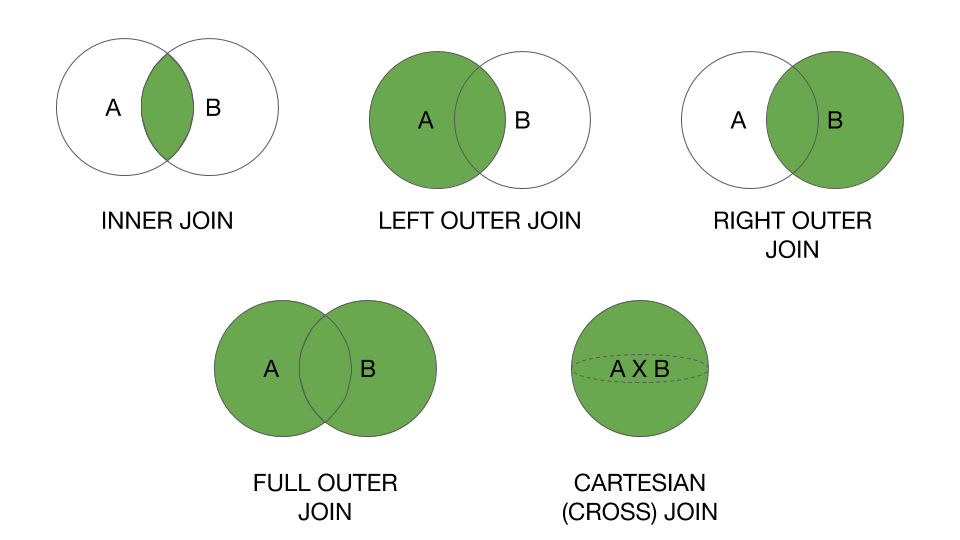

In [37]:
df = (prouni_notas.join(cursos_prouni_filter, "curso_id", how="left"))

In [38]:
#Dataset A
prouni_notas.columns

['curso_id',
 'nota_integral_ampla',
 'nota_integral_cotas',
 'nota_parcial_ampla',
 'nota_parcial_cotas']

In [39]:
#Dataset B
cursos_prouni_filter.columns

['uf_busca',
 'grau',
 'turno',
 'mensalidade',
 'curso_id',
 'nome',
 'universidade_nome']

In [40]:
#Resultado
df.columns

['curso_id',
 'nota_integral_ampla',
 'nota_integral_cotas',
 'nota_parcial_ampla',
 'nota_parcial_cotas',
 'uf_busca',
 'grau',
 'turno',
 'mensalidade',
 'nome',
 'universidade_nome']

In [41]:
df.limit(5).toPandas()

,curso_id,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas,uf_busca,grau,turno,mensalidade,nome,universidade_nome
0,706710394154,740.22,726.46,None,None,MS,Bacharelado,Integral,9999.99,Medicina,Universidade Anhanguera - UNIDERP
1,104191210567043,663.36,None,None,None,CE,Bacharelado,Noturno,9836.4,Enfermagem,Faculdade Princesa do Oeste - FPO
2,1002328574024,739.62,738.08,738.96,718.64,SP,Bacharelado,Integral,9715.61,Medicina,Universidade Cidade de São Paulo - UNICID
3,104191212798093,651.0,652.22,None,None,CE,Bacharelado,Noturno,9689.34,Psicologia,Faculdade Princesa do Oeste - FPO
4,65899611932754,758.32,723.94,734.92,711.26,AC,Bacharelado,Integral,9674.34,Medicina,Faculdade Barão do Rio Branco - FAB


In [42]:
##INNER
df_inner = cursos_prouni_filter.join(prouni_notas, "curso_id", how ="inner")

In [43]:
df_inner.columns

['curso_id',
 'uf_busca',
 'grau',
 'turno',
 'mensalidade',
 'nome',
 'universidade_nome',
 'nota_integral_ampla',
 'nota_integral_cotas',
 'nota_parcial_ampla',
 'nota_parcial_cotas']

### Broadcast

Broadcast faz com que os valores sejam salvos em memória (se não tiver memporia suficiente, vai pro disco), para todos os executores que irão precisar desses dados. 

Pode ser utilizado para joins entre tabelas grandes com tabelas relativamente pequenas.

Essa estratégia de join já é utilizada quando o tamanho de uma das tabelas fica abaixo da configuração *spark.sql.autoBroadcastJoinThreshold*

In [44]:
df_broadcast = df.join(broadcast(cursos_prouni), "curso_id", how="left")

In [74]:
print(df_broadcast.explain())
df_broadcast.limit(2).toPandas()

== Physical Plan ==
*(3) Project [curso_id#23, nota_integral_ampla#32, nota_integral_cotas#33, nota_parcial_ampla#34, nota_parcial_cotas#35, uf_busca#910, grau#900, turno#901, mensalidade#902, nome#915, universidade_nome#912, grau#1100, turno#1101, mensalidade#1102, bolsa_integral_cotas#1103, bolsa_integral_ampla#1104, bolsa_parcial_cotas#1105, bolsa_parcial_ampla#1106, curso_busca#1108, cidade_busca#1109, uf_busca#1110, cidade_filtro#1111, universidade_nome#1112, campus_nome#1113, ... 6 more fields]
+- *(3) BroadcastHashJoin [curso_id#23], [curso_id#1107], LeftOuter, BuildRight
   :- *(3) Project [curso_id#23, nota_integral_ampla#32, nota_integral_cotas#33, nota_parcial_ampla#34, nota_parcial_cotas#35, uf_busca#910, grau#900, turno#901, mensalidade#902, nome#915, universidade_nome#912]
   :  +- *(3) BroadcastHashJoin [curso_id#23], [curso_id#907], LeftOuter, BuildRight
   :     :- FileScan csv [curso_id#23,nota_integral_ampla#32,nota_integral_cotas#33,nota_parcial_ampla#34,nota_parcia

,curso_id,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas,uf_busca,grau,turno,mensalidade,nome,...,uf_busca,cidade_filtro,universidade_nome,campus_nome,campus_id,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,706710394154,740.22,726.46,None,None,MS,Bacharelado,Integral,9999.99,Medicina,...,MS,NTAwMjAwNDAyNzA0,Universidade Anhanguera - UNIDERP,CAMPO GRANDE - SEDE - Miguel Couto,706710,Medicina,740.22,726.46,None,None
1,104191210567043,663.36,None,None,None,CE,Bacharelado,Noturno,9836.4,Enfermagem,...,CE,MjMwNDAxODA0MTAz,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Enfermagem,663.36,None,None,None


In [45]:
df.explain()

== Physical Plan ==
*(2) Project [curso_id#23, nota_integral_ampla#32, nota_integral_cotas#33, nota_parcial_ampla#34, nota_parcial_cotas#35, uf_busca#472, grau#462, turno#463, mensalidade#464, nome#477, universidade_nome#474]
+- *(2) BroadcastHashJoin [curso_id#23], [curso_id#469], LeftOuter, BuildRight
   :- FileScan csv [curso_id#23,nota_integral_ampla#32,nota_integral_cotas#33,nota_parcial_ampla#34,nota_parcial_cotas#35] Batched: false, DataFilters: [], Format: CSV, Location: InMemoryFileIndex[file:/opt/dna-spark/data/cursos-prouni.csv], PartitionFilters: [], PushedFilters: [], ReadSchema: struct<curso_id:string,nota_integral_ampla:string,nota_integral_cotas:string,nota_parcial_ampla:s...
   +- BroadcastExchange HashedRelationBroadcastMode(List(input[4, string, true])), [id=#333]
      +- *(1) Project [uf_busca#472, grau#462, turno#463, mensalidade#464, curso_id#469, nome#477, universidade_nome#474]
         +- *(1) Filter isnotnull(curso_id#469)
            +- FileScan csv [grau#46

### Referências:

* [Spark - Anatomy of Spark Application](https://luminousmen.com/post/spark-anatomy-of-spark-application)
* [Spark UI](https://spark.apache.org/docs/3.0.0-preview2/web-ui.html)
* [Leitura de csv com o Spark](https://sparkbyexamples.com/spark/spark-read-csv-file-into-dataframe/)
* [Data Lineage](https://www.cienciaedados.com/o-que-e-linhagem-de-dados-data-lineage/)
* [Série Spark - Parte 3: Interfaces do Apache Spark](http://datascienceacademy.com.br/blog/serie-spark-e-databricks-parte-3-interfaces-do-apache-spark/)
* [SQL Nan Semantics](https://spark.apache.org/docs/3.0.0-preview/sql-ref-nan-semantics.html)
* [Joins -PySpark](https://dzone.com/articles/pyspark-join-explained-with-examples)
* [Broadcast](https://www.tutorialspoint.com/pyspark/pyspark_broadcast_and_accumulator.htm)
* [Broadcast - SQL](https://jaceklaskowski.gitbooks.io/mastering-spark-sql/content/spark-sql-joins-broadcast.html)
* [SQL Hint](https://jaceklaskowski.gitbooks.io/mastering-spark-sql/content/spark-sql-hint-framework.html)